# <font color=blue>Assignments for "Imbalanced Data"</font>

Using the [dataset](https://sci2s.ugr.es/keel/dataset/data/imbalanced/cleveland-0_vs_4.zip) for the [risk of heart attack](https://sci2s.ugr.es/keel/dataset.php?cod=980) with class imbalance:

1. Create a logistic regression model and measure the performance of it.
2. By experimenting with different methods and class ratios; overcome class imbalance, determine the best performing method and class ratio.

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,auc,classification_report,confusion_matrix,roc_curve
from sklearn.metrics import classification_report, precision_recall_fscore_support
from sklearn.utils import resample
import warnings
warnings.filterwarnings(action="ignore")

pd.options.display.max_columns = None

In [45]:
df = pd.read_csv('C:/Users/Elif/data/cleveland.dat',skiprows = 18,error_bad_lines=False)
df.columns =['age', 'sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num'] 
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,negative
1,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,negative
2,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,negative
3,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,negative
4,57.0,1.0,4.0,140.0,192.0,0.0,0.0,148.0,0.0,0.4,2.0,0.0,6.0,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,64.0,1.0,4.0,145.0,212.0,0.0,2.0,132.0,0.0,2.0,2.0,2.0,6.0,positive
172,38.0,1.0,1.0,120.0,231.0,0.0,0.0,182.0,1.0,3.8,2.0,0.0,7.0,positive
173,61.0,1.0,4.0,138.0,166.0,0.0,2.0,125.0,1.0,3.6,2.0,1.0,3.0,positive
174,58.0,1.0,4.0,114.0,318.0,0.0,1.0,140.0,0.0,4.4,3.0,3.0,6.0,positive


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       176 non-null    float64
 1   sex       176 non-null    float64
 2   cp        176 non-null    float64
 3   trestbps  176 non-null    float64
 4   chol      176 non-null    float64
 5   fbs       176 non-null    float64
 6   restecg   176 non-null    float64
 7   thalach   176 non-null    float64
 8   exang     176 non-null    float64
 9   oldpeak   176 non-null    float64
 10  slope     176 non-null    float64
 11  ca        176 non-null    object 
 12  thal      176 non-null    object 
 13  num       176 non-null    object 
dtypes: float64(11), object(3)
memory usage: 19.4+ KB


In [47]:
df["num"] = pd.get_dummies(df.num, drop_first=True)


Possitive  ratio : %7.39
Negative ratio     : %92.61


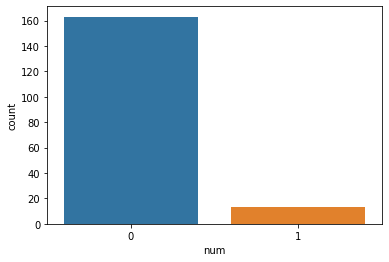

In [48]:
sns.countplot(df.num)

print("Possitive  ratio : %{:.2f}".format(sum(df.num)/len(df.num)*100))
print("Negative ratio     : %{:.2f}".format((len(df.num)-sum(df.num))/len(df.num)*100))

In [49]:
def create_model(X, y):
    X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.20, random_state=111, stratify = y)
    
    log_reg = LogisticRegression()
    log_reg.fit(X_train, y_train)

    pred_train = log_reg.predict(X_train)
    pred_test = log_reg.predict(X_test)
    
    conf_mtx_train = confusion_matrix(y_train, pred_train)
    conf_mtx_test = confusion_matrix(y_test, pred_test)
    
    
    print("Accuracy : {}\n".format(log_reg.score(X_test, y_test)))
    
    print("Train Dataset")
    print(classification_report(y_train, pred_train))
    
    print("Test Dataset")
    print(classification_report(y_test, pred_test))
    
    print("*********************************************")
    
    print("The number of observations in training set is {}".format(X_train.shape[0]))
    print("The number of observations in test set is {}".format(X_test.shape[0]))
    
    print("*********************************************")

    print("Confusion Matrix Train Data\n",conf_mtx_train,"\n","**************************")
    print("Confusion Matrix Test Data \n",conf_mtx_test)
    return  None

In [50]:
df.ca=df.ca.replace("<null>", float(df.ca.mode()))
df.ca=df.ca.astype("float")


df.thal=df.thal.replace("<null>", float(df.ca.mode()))
df.thal=df.thal.astype("float")

In [51]:
X = df.drop("num",axis=1)
Y = df["num"]

create_model(X,Y)

Accuracy : 0.9444444444444444

Train Dataset
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       130
           1       1.00      0.70      0.82        10

    accuracy                           0.98       140
   macro avg       0.99      0.85      0.91       140
weighted avg       0.98      0.98      0.98       140

Test Dataset
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        33
           1       1.00      0.33      0.50         3

    accuracy                           0.94        36
   macro avg       0.97      0.67      0.74        36
weighted avg       0.95      0.94      0.93        36

*********************************************
The number of observations in training set is 140
The number of observations in test set is 36
*********************************************
Confusion Matrix Train Data
 [[130   0]
 [  3   7]] 
 **************************
Confusion Matrix Tes

By experimenting with different methods and class ratios; overcome class imbalance, determine the best performing method and class ratio.

In [52]:
from sklearn.utils import resample
normal_shopping = df[df.num == 0]
fraudulent_shopping = df[df.num == 1]

fraudulent_shopping_upsampled = resample(fraudulent_shopping,
                                         replace = True,
                                         n_samples = len(normal_shopping),
                                         random_state = 111)

upsampled_df = pd.concat([normal_shopping, fraudulent_shopping_upsampled])
upsampled_df.num.value_counts()

1    163
0    163
Name: num, dtype: int64

In [53]:
X = upsampled_df.drop('num', axis=1)
y = upsampled_df['num']

create_model(X,y)

Accuracy : 1.0

Train Dataset
              precision    recall  f1-score   support

           0       1.00      0.93      0.96       130
           1       0.94      1.00      0.97       130

    accuracy                           0.97       260
   macro avg       0.97      0.97      0.97       260
weighted avg       0.97      0.97      0.97       260

Test Dataset
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        33

    accuracy                           1.00        66
   macro avg       1.00      1.00      1.00        66
weighted avg       1.00      1.00      1.00        66

*********************************************
The number of observations in training set is 260
The number of observations in test set is 66
*********************************************
Confusion Matrix Train Data
 [[121   9]
 [  0 130]] 
 **************************
Confusion Matrix Test Data 
 [[33  

In [57]:
!pip install scikit-learn

In [54]:
!python -m pip install --user --upgrade pip

Requirement already up-to-date: pip in c:\users\elif\appdata\roaming\python\python37\site-packages (20.2.3)


In [55]:
!pip install imbalanced-learn

In [61]:
from imblearn.over_sampling import SMOTE

y = df.num
X = df.drop('num', axis=1)

sm = SMOTE(random_state=27, sampling_strategy=1.0)
X_smote, y_smote = sm.fit_sample(X, y)

ImportError: cannot import name '_to_object_array' from 'sklearn.utils' (C:\Users\Elif\anaconda3\lib\site-packages\sklearn\utils\__init__.py)